In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
nx = 8
ny = 8
dx = 1.0/nx
dy = 1.0/ny

In [10]:
Xu, Yu = np.meshgrid(np.linspace(0,1,nx+1), np.linspace(0.5*dy,1-0.5*dy,ny))
Xv, Yv = np.meshgrid(np.linspace(0.5*dx, 1.0-0.5*dx,nx), np.linspace(0,1,ny+1))
Xp, Yp = np.meshgrid(np.linspace(0.5*dx,1.0-0.5*dx,nx), np.linspace(0.5*dy,1.0-0.5*dy,ny))

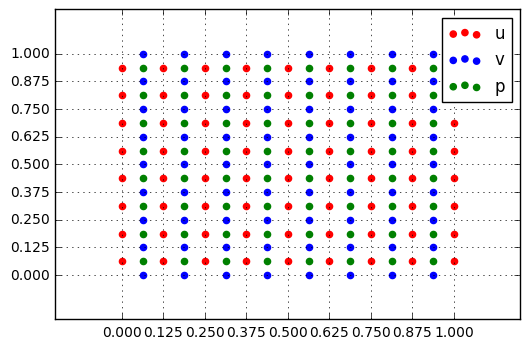

In [15]:
plt.scatter(Xu,Yu, color="red", label="u")
plt.scatter(Xv,Yv, color="blue", label="v")
plt.scatter(Xp,Yp, color="green", label="p")
plt.legend()
ax = plt.gca()
ax.set_xticks(np.linspace(0,1,nx+1))
ax.set_yticks(np.linspace(0,1,ny+1))
plt.grid(True)

In [17]:
nx = 32
ny = 32
dx = 1.0/nx
dy = 1.0/ny

In [38]:
Xu, Yu = np.meshgrid(np.linspace(0,1,nx+1), np.linspace(0.5*dy,1-0.5*dy,ny), indexing="ij")
Xv, Yv = np.meshgrid(np.linspace(0.5*dx, 1.0-0.5*dx,nx), np.linspace(0,1,ny+1), indexing="ij")
Xp, Yp = np.meshgrid(np.linspace(0.5*dx,1.0-0.5*dx,nx), np.linspace(0.5*dy,1.0-0.5*dy,ny), indexing="ij")

In [57]:
us = []
vs = []
ps = []
for time_index in range(14):
    us.append(np.reshape(np.loadtxt("run/u_%05d.csv"%time_index),(nx+1,ny)))
    vs.append(np.reshape(np.loadtxt("run/v_%05d.csv"%time_index),(nx,ny+1)))
    ps.append(np.reshape(np.loadtxt("run/p_%05d.csv"%time_index),(nx,ny)))

In [94]:
ps = []
nt = 7
source =np.reshape(np.loadtxt("source/source_%05d.csv"%nt),(nx,ny))
for it_index in range(1000):
    ps.append(np.reshape(np.loadtxt("press%05d/p_%05d.csv"%(nt,it_index)), (nx,ny)))

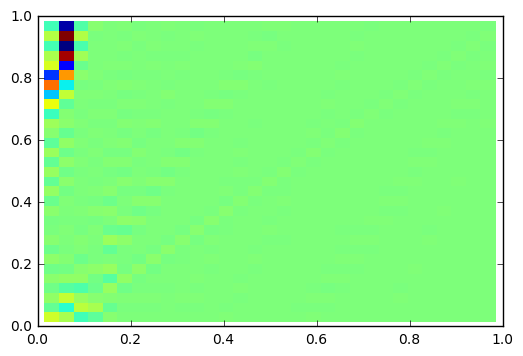

In [95]:
a = plt.pcolormesh(Xp, Yp, source)

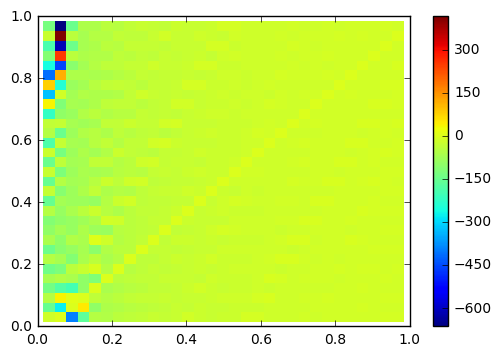

In [96]:
a = plt.pcolormesh(Xp, Yp, ps[999])
plt.colorbar(a)

In [98]:
deltasq = dx*dx

In [99]:
Target = ps[999]
LapTarget = np.empty((nx,ny))
LapTarget[1:nx-1,1:ny-1] = (Target[:nx-2,1:ny-1] + Target[2:,1:ny-1] + Target[1:nx-1,:ny-2] + Target[1:nx-1,2:] - 4*Target[1:nx-1,1:ny-1])/deltasq
LapTarget[0,1:ny-1] = (Target[0,2:] + Target[0,:ny-2] + Target[1,1:ny-1] - 3*Target[0,1:ny-1])/deltasq
LapTarget[-1,1:ny-1] = (Target[-1,2:] + Target[-1,:ny-2] + Target[-2,1:ny-1] - 3*Target[-1,1:ny-1])/deltasq
LapTarget[1:nx-1,0] = (Target[2:,0] + Target[:nx-2,0] + Target[1:nx-1,1] - 3*Target[1:nx-1,0])/deltasq
LapTarget[1:nx-1,-1] = (Target[2:,-1] + Target[:nx-2,-1] + Target[1:nx-1,-2] - 3*Target[1:nx-1,-1])/deltasq
LapTarget[0,0] = (Target[0,1] + Target[1,0] - 2*Target[0,0])/deltasq
LapTarget[-1,0] = (Target[-1,1] + Target[-2,0] - 2*Target[-1,0])/deltasq
LapTarget[0,-1] = (Target[0,-2] + Target[1,-1] - 2*Target[0,-1])/deltasq
LapTarget[-1,-1] = (Target[-1,-2] + Target[-2,-1] - 2*Target[-1,-1])/deltasq